In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import dynadojo as dd
import numpy as np


2023-08-31 00:38:33.344061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


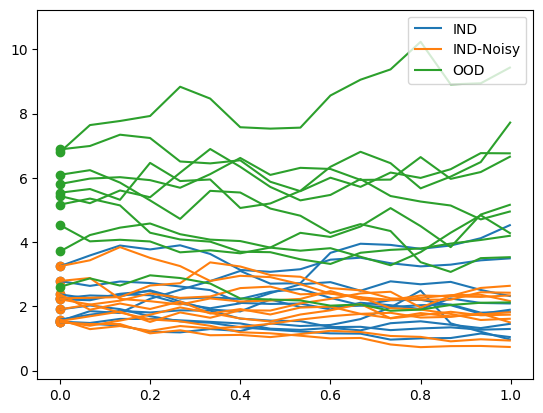

In [ ]:
# Black-Scholes-Barenblatt PDE, often used for simulating finacial data and assets management
latent_dim = [60]
embed_dim = 1
n = 10
timesteps = 15
for dim in latent_dim:
    system = dd.systems.fbsnn_pde.BSBSystem(dim, embed_dim)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.fbsnn_pde.plot([x, x_noisy, y], timesteps=timesteps, target_dim=1, max_lines=100, labels=["IND", "IND-Noisy", "OOD"])

In [121]:
# Hamilton-Jacobi-Bellman PDE, often used for simulating finacial data and assets management
latent_dim = [80]
embed_dim = 1
n = 10
timesteps = 15
for dim in latent_dim:
    system = dd.systems.fbsnn_pde.HJBSystem(dim, embed_dim)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.fbsnn_pde.plot([x, x_noisy, y], timesteps=timesteps, target_dim=1, max_lines=100, labels=["IND", "IND-Noisy", "OOD"])